# Predicting House Prices in Amsterdam with ANN

In this Jupyter Notebook, we will be using deep learning to predict house prices in Amsterdam. We will be doing regression on the data and split it so we can see how well the model performs after it is done fitting. The data comes from the following Kaggle dataset: Amsterdam house price prediction. Kaggle. (2021, August 24). Retrieved May 4, 2022, from https://www.kaggle.com/datasets/thomasnibb/amsterdam-house-price-prediction 

Let's change directory to where data is located and import pandas

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('data/housing_price.csv')

We will drop Unnamed: 0 and Address. Both are unnecessary for our analysis as Unnamed: 0 is basically an index of the rows and Address does not help our model learn. Zip is better since it tells us which neighborhood the house is in, which we are keeping for our analysis

In [5]:
df.head()

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [6]:
df = df.drop(['Unnamed: 0','Address'],axis=1)

There are now 5 feature columns and 1 target variable (Price)

In [7]:
df.head()

,Zip,Price,Area,Room,Lon,Lat
0,1091 CR,685000.0,64,3,4.907736,52.356157
1,1059 EL,475000.0,60,3,4.850476,52.348586
2,1097 SM,850000.0,109,4,4.944774,52.343782
3,1060 TH,580000.0,128,6,4.789928,52.343712
4,1036 KN,720000.0,138,5,4.902503,52.410538


There are 4 rows in our dataset that have NA values. Let's drop them since there are a total of 924 rows in our data

In [8]:
df.isna().sum()

Zip      0
Price    4
Area     0
Room     0
Lon      0
Lat      0
dtype: int64

In [9]:
len(df)

924

In [10]:
df = df.dropna()

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

Here is a histogram of the Price feature. You can see most of the houses cost less than 2 million euros

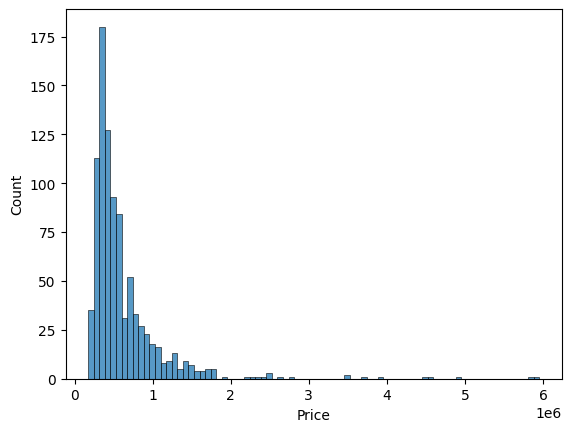

In [12]:
sns.histplot(data=df['Price']);

A histogram of the Area column. You can see most of the homes are within 300 square meters

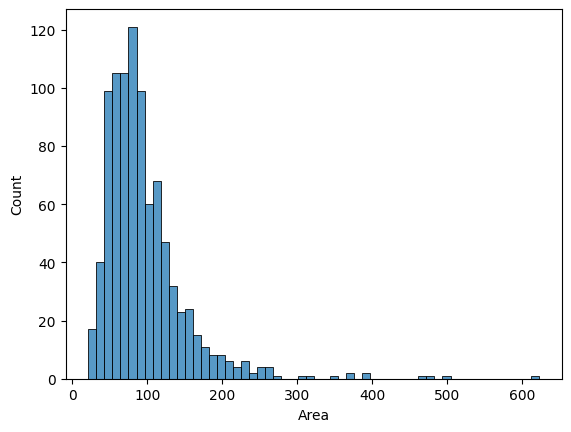

In [13]:
sns.histplot(data=df['Area']);

Here is a countplot of the Room feature. 3 room homes are highest in our dataset

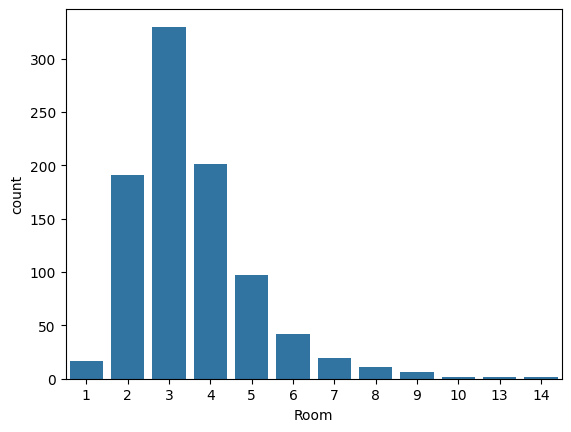

In [14]:
sns.countplot(x=df['Room']);

Now let's separate the data into X and y variables

In [15]:
X = df.drop('Price',axis=1)
y = df['Price']

You can see there is a strong correlation between Area and Room. We should remove one of these columns

In [17]:
X.corr(numeric_only=True)

,Area,Room,Lon,Lat
Area,1.000000,0.808285,0.021762,0.014179
Room,0.808285,1.000000,-0.025753,-0.021168
Lon,0.021762,-0.025753,1.000000,-0.183445
Lat,0.014179,-0.021168,-0.183445,1.000000


We will remove Area

In [18]:
X = X.drop('Area',axis=1)

Let's now get dummies for the Zip column

In [19]:
X = pd.get_dummies(X, columns=['Zip'])

In [20]:
from sklearn.model_selection import train_test_split

Let's split our data 80/20 since we just have 920 rows. We want to use more of the data on training then testing

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler

Let's now scale our X data using StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
scaled_X_train = scaler.fit_transform(X_train)

In [25]:
scaled_X_test = scaler.transform(X_test)

In [26]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam, SGD

We will use rmse as our metric and adam as our optimizer

In [27]:
rmse = RootMeanSquaredError()

In [28]:
# update learning rate based on how much time you have and whether the model is overfitting
adam = Adam(learning_rate=0.1)

Our model is basic since our data is basic. We only have a few columns that we are feeding our model and not too many rows of data either. So, our model should be basic since we want to avoid overfitting to the training data. We will have only one Dense layer which basically serves as both the input and output layers. Its activation function will be relu since we want a positive value greater than 0 as our output. The loss will be mse, optimizer adam, and metric will be rmse. This model was a result of multiple hyperparameter tunings and seeing how the model performed through the metric and loss for both training and validation data

In [29]:
model = Sequential()
model.add(Dense(1,activation='relu'))
model.compile(loss='mse',optimizer=adam,metrics=rmse)

Early stopping helps us prevent overfitting

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
early = EarlyStopping(patience=10,monitor='val_root_mean_squared_error')

We will use 100,000 as our epochs. It seems a lot but for our data, it works. Especially since each epoch takes a few milliseconds to complete. We will make batch_size = 1 to prevent overfitting

In [32]:
model.fit(scaled_X_train,y_train,epochs=100000,callbacks=early,batch_size=1,validation_data=(scaled_X_test,y_test))

Epoch 1/100000

736/736 [==============================] - 1s 1ms/step - loss: 671482445824.0000 - root_mean_squared_error: 819440.3125 - val_loss: 699231633408.0000 - val_root_mean_squared_error: 836200.6875
Epoch 2/100000
736/736 [==============================] - 1s 1ms/step - loss: 671352094720.0000 - root_mean_squared_error: 819360.8125 - val_loss: 698542653440.0000 - val_root_mean_squared_error: 835788.6250
Epoch 3/100000
736/736 [==============================] - 1s 1ms/step - loss: 671212896256.0000 - root_mean_squared_error: 819275.8125 - val_loss: 697846005760.0000 - val_root_mean_squared_error: 835371.7500
Epoch 4/100000
736/736 [==============================] - 1s 1ms/step - loss: 671076188160.0000 - root_mean_squared_error: 819192.3750 - val_loss: 697171902464.0000 - val_root_mean_squared_error: 834968.1875
Epoch 5/100000
736/736 [==============================] - 1s 1ms/step - loss: 670941839360.0000 - root_mean_squared_error: 819110.3750 - val_loss: 696509923328.0000 - 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Here is a plot of the loss vs. val_loss through all of the epochs

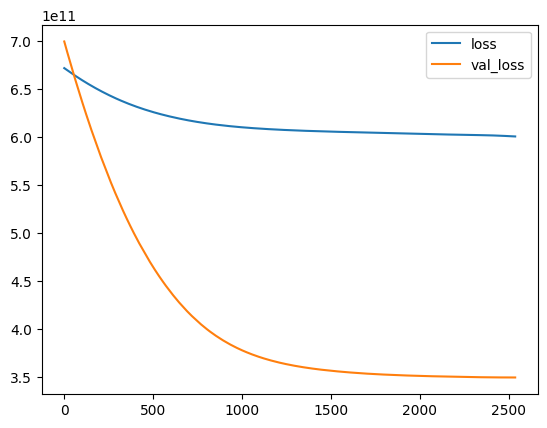

In [33]:
pd.DataFrame(model.history.history)[['loss','val_loss']].plot();

Here is a plot of the root_mean_squared_error vs. val_root_mean_squared_error through all of the epochs

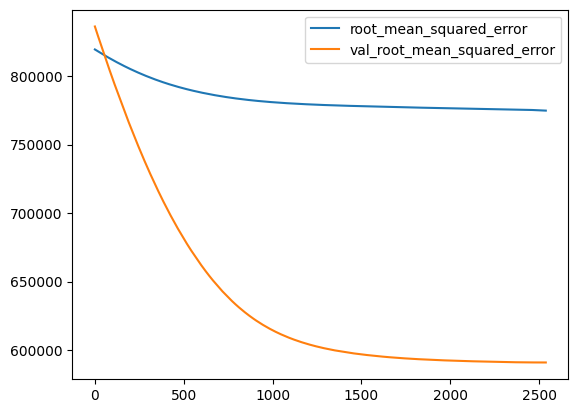

In [34]:
pd.DataFrame(model.history.history)[['root_mean_squared_error','val_root_mean_squared_error']].plot();

In [35]:
# 10^5 equals 100,000 and 10^6 equals 1,000,000
df.describe()

,Price,Area,Room,Lon,Lat
count,9.200000e+02,920.000000,920.00000,920.000000,920.000000
mean,6.220654e+05,95.607609,3.56413,4.888652,52.363271
std,5.389942e+05,56.849699,1.57103,0.053118,0.024054
min,1.750000e+05,21.000000,1.00000,4.644819,52.291519
25%,3.500000e+05,60.000000,3.00000,4.855834,52.351925
50%,4.670000e+05,83.000000,3.00000,4.886818,52.364499
75%,7.000000e+05,113.000000,4.00000,4.922337,52.377545
max,5.950000e+06,623.000000,14.00000,5.029122,52.423805


The last epoch had a val_root_mean_squared_error of 591,106.4375. This is pretty good knowing that Price goes from 175,000 to 5,950,000 with a mean of about 622,000

It seems the model does a good job generalizing as you can see the validation loss and root mean squared error are lower than their training counterparts in the plots above. It can also be just this testing set since the set was chosen by random. We won't know for sure until we have more data to test with

This project allowed me to realize the importance of using validation data in my model. I did one run-through without it and it really didn't allow me to see if the model was overfitting or not. Also, the importance of hyperparameter tuning is high. You should tune so you don't overfit to the training data. Going forward, this model can be improved by more data, hyperparameter tunings, etc

# Github

https://github.com/panta96pranav/CSCA_5642_Final_Project